# Bai 1

MSE =  65.48999999999995


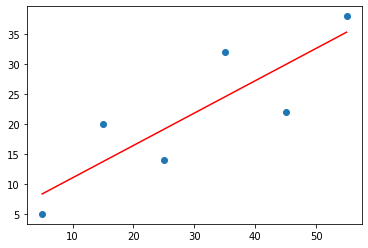

In [19]:
from numpy.linalg import inv as inv
from numpy.linalg import pinv as pinv
from numpy.linalg import lstsq as lstsq
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])
model = LinearRegression().fit(x, y)

plt.scatter(x, y, label = "Original data")
plt.plot(x, x * model.coef_ + model.intercept_, 'r', label = 'Fitted line' )
print("MSE = ", mean_squared_error(y, x * model.coef_ + model.intercept_ + model.intercept_))

MSE =  33.5154761904762


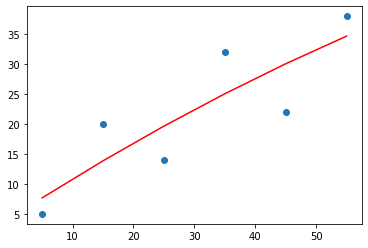

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
model = LinearRegression().fit(x_, y)

plt.scatter(x, y, label = "Original data")
plt.plot(x, model.coef_ @ x_.T + model.intercept_, 'r', label = 'Fitted line' )
print("MSE = ", mean_squared_error(y, model.coef_ @ x_.T + model.intercept_))

In [21]:
model.coef_

array([ 0.65785714, -0.00196429])

# Bai 2

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = [[0, 1], [1, 1], [3, 2], [5, 5], [7, 11], [9, 15], [11, 34], [12, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
model = LinearRegression().fit(x, y)
# plt.scatter(x, y, label = "Original data")
# plt.plot(x, model.coef_ @ x_.T + model.intercept_, 'r', label = 'Fitted line' )
print("MSE = ", mean_squared_error(y, model.coef_ @ x.T + model.intercept_))

MSE =  25.561871814835783


In [34]:
sqrX = np.sqrt(x)

model = LinearRegression().fit(sqrX, y)
# plt.scatter(x, y, label = "Original data")
# plt.plot(x, model.coef_ @ x_.T + model.intercept_, 'r', label = 'Fitted line' )
print("MSE = ", mean_squared_error(y, model.coef_ @ sqrX.T + model.intercept_))

MSE =  23.478752498886994


In [67]:
X_2 = x**2
k = np.prod(x, axis=1)
k = k[:,np.newaxis]
x_value = np.hstack((x,k, X_2 )) 
model = LinearRegression().fit(x_value, y)
# plt.scatter(x, y, label = "Original data")
# plt.plot(x, model.coef_ @ x_.T + model.intercept_, 'r', label = 'Fitted line' )
print("MSE = ", mean_squared_error(y, model.coef_ @ x_value.T + model.intercept_))

MSE =  10.089451361420533


# Bai 3

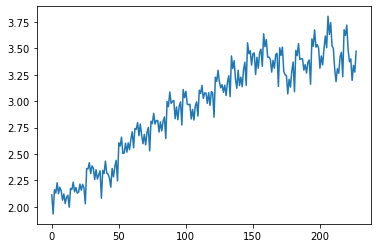

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
data=pd.read_csv('milk.csv')
import matplotlib.pyplot as plt
data['Milk.Prod'].plot()
plt.show()

In [5]:
milk=pd.read_csv('milk.csv')
milk.head()
month=milk['Month']
values = np.array(month)
one_hot_encode=pd.get_dummies(values)
df=pd.concat([milk,one_hot_encode],axis=1)
one_hot_encode['Time']=np.arange(len(one_hot_encode))
x=one_hot_encode.values
y=milk['Milk.Prod'].values

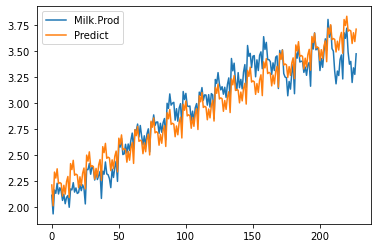

In [6]:
y=y.reshape(-1,1)
model = LinearRegression().fit(x, y)
model.score(x,y)

y_pred=model.predict(x)
milk['Predict']=y_pred

milk[['Milk.Prod','Predict']].plot()
plt.show()

In [7]:
milk.head()

,Year,Month,Milk.Prod,Predict
0,1995,Jan,2.112,2.210471
1,1995,Feb,1.932,2.010208
2,1995,Mar,2.162,2.334682
3,1995,Apr,2.130,2.276997
4,1995,May,2.227,2.366261
